In [12]:
import matplotlib.pyplot as plt
import numpy as np

### Brackets

In [11]:
three = [0.69675201, 0.82386524, 0.37666655]
seven = [0.49514359, 0.84467227, 0.68952846, 0.64472867, 0.11026406, 0.74287437, 0.01340736]
fifty = "0.20593268 0.16013805 0.65402372 0.6769165  0.88966385 0.12444307 0.76855206 0.21304153 0.58890904 0.66801638 0.24393546 0.05220168 0.58362786 0.25430621 0.16642243 0.89119648 0.39896359 0.70188541 0.78476342 0.2790986  0.2280078  0.73421899 0.76186308 0.16708024 0.43226044 0.52482705 0.45102005 0.00631449 0.18016459 0.16589824 0.58211142 0.64158489 0.67567972 0.40407831 0.47302373 0.3694996 0.65222606 0.40343078 0.45740349 0.38688711 0.71946269 0.27814503 0.37478189 0.41313403 0.07404384 0.60172806 0.64372939 0.48194606 0.8348352  0.38196127".split()
fifty = [float(s) for s in fifty]

In [63]:
iceland_scale = 140000

us_tax_brackets = [(9700, 0.1), (39475, 0.12), (84200, 0.22), (160725, 0.24), (204100, 0.32), (510300, 0.35), (510300, 0.37)]
iceland_tax_brackets = [(45, 0.3145), (90, 0.3795), (90, 0.4625)]

### Calculation

In [48]:
def fixed_bracket_tax(brackets, income):
    taxes = 0
    for i in range(len(brackets)):
        rate, amount = brackets[i][1], 0
        if i == len(brackets) - 1 and income >= brackets[i][0]:
            # last tax bracket isn't a bracket ceiling, it's a minimum.
            amount = income - brackets[i][0]
        elif income >= brackets[i][0]:
            amount = (brackets[i][0] - brackets[i-1][0]) if i > 0 else brackets[i][0]
        elif income < brackets[i][0]:
            amount = income - brackets[i-1][0] if i > 0 else income 
            taxes += amount * rate
            # print(f'Paid {rate * 100}% on £{amount}.')
            break
        else:
            raise Exception('Did not expect to get here.')
            
        taxes += amount * rate
        # print(f'Paid {rate * 100}% on £{amount}.')
    return taxes            

In [36]:
def variable_bracket_tax(income, brackets, top_bracket_cutoff, linear=True):
    """
    `income` is a number, `brackets` is a list of brackets and linear is a bool
    allowing us to specify whether there is linear or log-spacing between the
    bracket cut-offs.
    """
    cutoffs = None
    
    # Compute Bracket Cutoffs
    if linear:
        cutoffs = np.linspace(0, top_bracket_cutoff, len(brackets))
    else:
        b0_max = top_bracket_cutoff / (2 ** (len(brackets) - 2))
        cutoffs = np.concatenate(
            [[0], 2 ** np.linspace(np.log2(b0_max), np.log2(top_bracket_cutoff), len(brackets) - 1)]
        )
    
    # Given the cutoffs, work out how much tax needs to be paid.
    bracket_edges = np.concatenate([cutoffs, [np.inf]])
    bracket_sizes = bracket_edges[1:] - bracket_edges[:-1]
    past_cutoff = np.maximum(0, income - cutoffs)
    bin_income = np.minimum(bracket_sizes, past_cutoff)
    bin_taxes = brackets * bin_income
    return np.sum(bin_taxes)

### Plotting

In [67]:
def plot_effective_tax(incomes, brackets, top_bracket_cutoff, labels, title, xlabel, ylabel, filepath=None):    
    # Calculate Income Effective Tax Rates
    three_etr = [variable_bracket_tax(income, three, top_bracket_cutoff, linear=False) / income for income in incomes]
    seven_etr = [variable_bracket_tax(income, seven, top_bracket_cutoff, linear=False) / income for income in incomes]
    fifty_etr = [variable_bracket_tax(income, fifty, top_bracket_cutoff) / income for income in incomes]
    us_etr = [(fixed_bracket_tax(us_tax_brackets, income * 1000) / (income * 1000)) for income in incomes]
    iceland_etr = [(fixed_bracket_tax(iceland_tax_brackets, income) / income) for income in incomes]
    # saez_etr = ... we don't have it yet.

    fig, ax = plt.subplots(figsize=(18, 10))
    
    labels.append("US Federal 2018")
    labels.append("Iceland")
    lines = [three_etr, seven_etr, fifty_etr, us_etr, iceland_etr]
  
    # Plot each line
    for i, line in enumerate(lines):
        ax.plot(incomes, line, label=labels[i])

    # Add a legend
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Save the plot to a file if a filepath is given
    if filepath:
        plt.savefig(filepath)

    # Show the plot
    plt.show()

/var/folders/jr/pqljr03x7nj4zgr1d6x9mxsw0000gn/T/ipykernel_66751/3185087509.py:3: RuntimeWarning: invalid value encountered in double_scalars
  three_etr = [variable_bracket_tax(income, three, top_bracket_cutoff, linear=False) / income for income in incomes]
/var/folders/jr/pqljr03x7nj4zgr1d6x9mxsw0000gn/T/ipykernel_66751/3185087509.py:4: RuntimeWarning: invalid value encountered in double_scalars
  seven_etr = [variable_bracket_tax(income, seven, top_bracket_cutoff, linear=False) / income for income in incomes]
/var/folders/jr/pqljr03x7nj4zgr1d6x9mxsw0000gn/T/ipykernel_66751/3185087509.py:5: RuntimeWarning: invalid value encountered in double_scalars
  fifty_etr = [variable_bracket_tax(income, fifty, top_bracket_cutoff) / income for income in incomes]
/var/folders/jr/pqljr03x7nj4zgr1d6x9mxsw0000gn/T/ipykernel_66751/3185087509.py:6: RuntimeWarning: invalid value encountered in double_scalars
  us_etr = [(fixed_bracket_tax(us_tax_brackets, income * 1000) / (income * 1000)) for income in

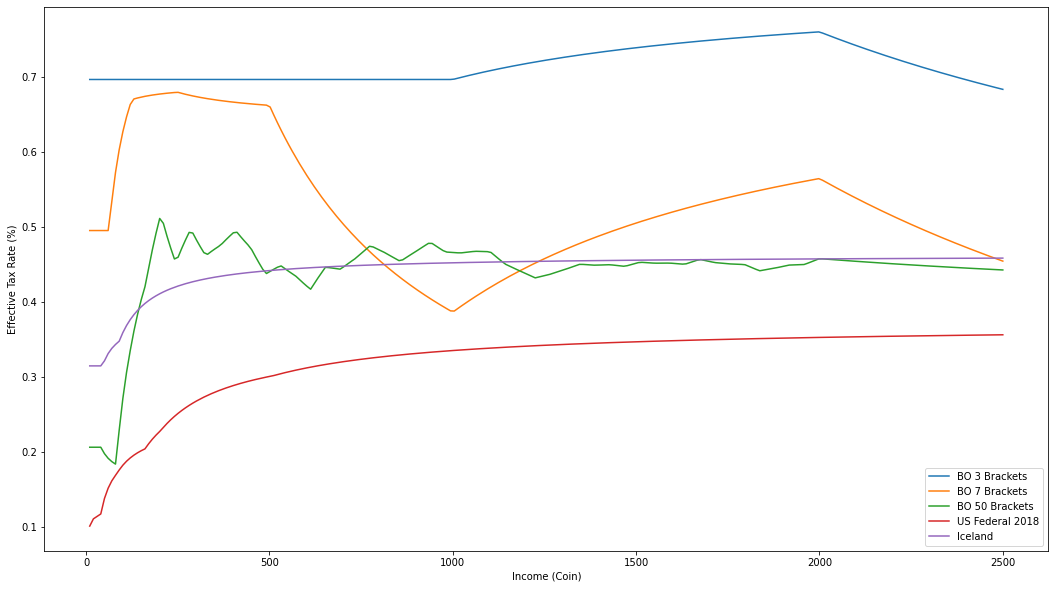

In [68]:
top_bracket_cutoff = 2000
incomes = np.linspace(0, 2500, 250)
brackets = [three, seven, fifty]
labels = ['BO 3 Brackets', 'BO 7 Brackets', 'BO 50 Brackets']
xlabel = 'Income (Coin)'
ylabel = 'Effective Tax Rate (%)'

plot_effective_tax(incomes, brackets, top_bracket_cutoff, labels, "", xlabel, ylabel, "policy_comparison.png")